This notebook provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display some images.

Builds several fully connected networks exploring both in depth and width of the network-

### Refs 

https://www.tensorflow.org/install

https://www.tensorflow.org/tutorials/keras/classification
    

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Auxiliary functions to show plots of training history and display images

In [43]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, images, labels):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(images[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
      


def show_histories():

    # summarize history for accuracy
    plt.plot(history1.history['accuracy'])
    plt.plot(history2.history['accuracy'])
    plt.plot(history3.history['accuracy'])
    plt.plot(history4.history['accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['model 1', 'model 2', 'model 3', 'model 4'], loc='lower right')
    plt.show()


def show_accuracies(): 
    fig, ax = plt.subplots()
    X = np.arange(4)

    models = ['model 1', 'model 2', 'model 3', 'model 4']
    plt.bar(X, eval, width = 0.4, color = 'b', label='eval')
    plt.bar(X + 0.4, train, color = 'r', width = 0.4, label = "train")
    plt.xticks(X + 0.4 / 2, models)
    plt.ylim(top = 1.0, bottom = 0.95)
    plt.legend(loc='lower right')
    plt.show()

    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()

class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')    

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
        

## Load the dataset from Tensorflow 

In [44]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

eval = []
train = []

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display a few images

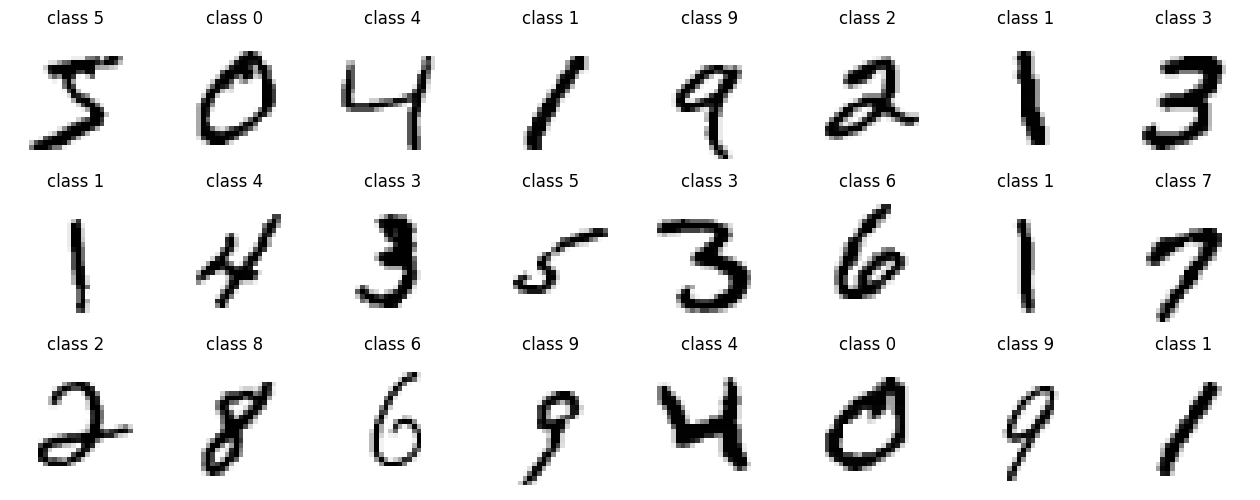

<Figure size 640x480 with 0 Axes>

In [45]:
show_images(3,8,x_train, y_train) 

# Create first model

Single hidden layer with 64 units

In [46]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


## Display model information

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


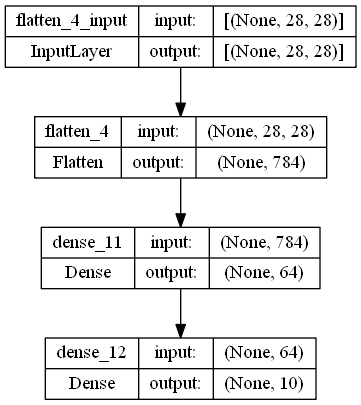

In [47]:
print(model1.summary())
# the second parameter can be used to save the plot to a file
tf.keras.utils.plot_model(model1, 'multi_input_and_output_model.png', show_shapes=True)

## Specify the optimizer, loss and metrics

optimizer: gradient descent optimization algorithm

loss: the loss function upon which derivatives are computed

metrics: metrics to be evaluated during tranining and evaluation

In [48]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [49]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.9160
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9587
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9699
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0823 - accuracy: 0.9749
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9799
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9855
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.031

## History graphs for accuracy and loss


dict_keys(['loss', 'accuracy'])


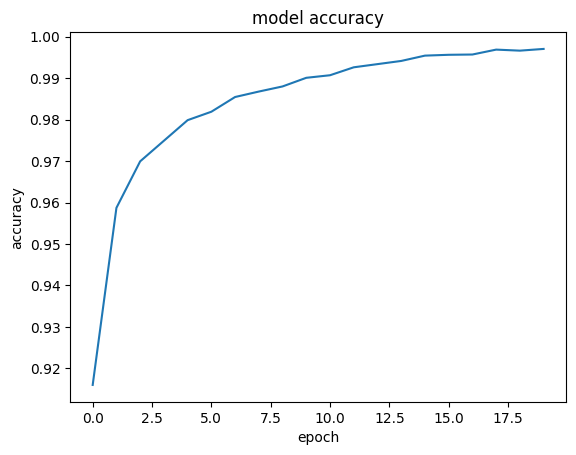

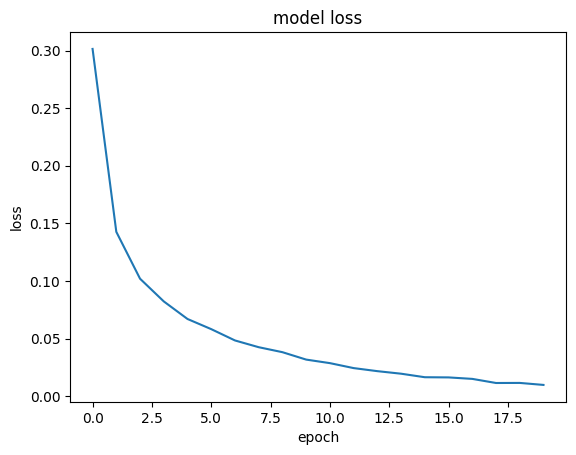

In [50]:
show_history(history1)


## Evaluate the model on the test set

In [51]:
eval.append(model1.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history1.history['accuracy'][19])



313/313 - 1s - loss: 0.1051 - accuracy: 0.9750 - 682ms/epoch - 2ms/step


# Create model 2

wider model, doubling the number of units in the hidden layer

In [52]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Display model information

In [53]:
print(model2.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

In [54]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9273
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9673
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9864
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - accuracy: 0.9933
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


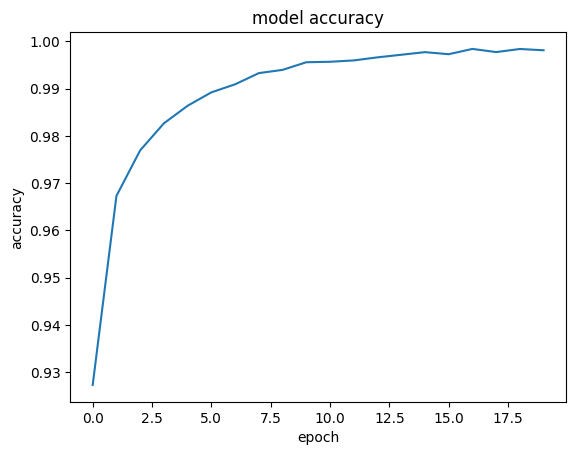

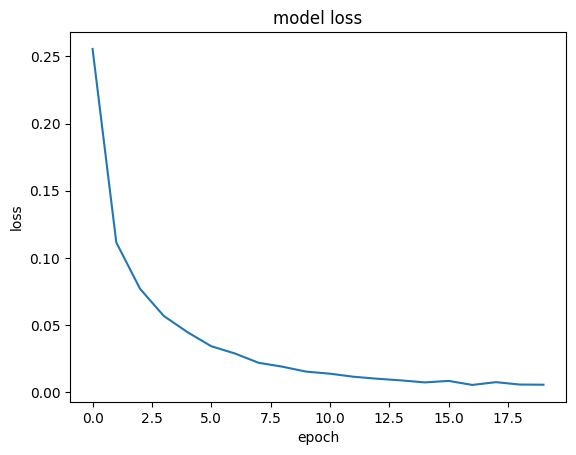

In [55]:
show_history(history2)

## Evaluate the model on the test set

In [56]:
eval.append(model2.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history2.history['accuracy'][19])

313/313 - 1s - loss: 0.1068 - accuracy: 0.9795 - 636ms/epoch - 2ms/step


# Model 3

Adding a second hidden layer

In [57]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
print(model3.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2290 - accuracy: 0.9319
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0936 - accuracy: 0.9707
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9801
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9901
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

dict_keys(['loss', 'accuracy'])


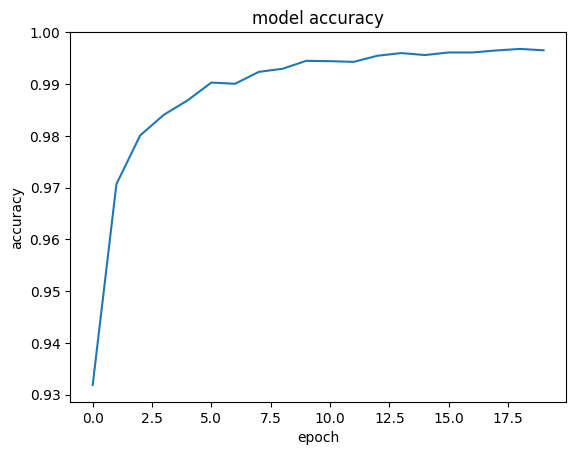

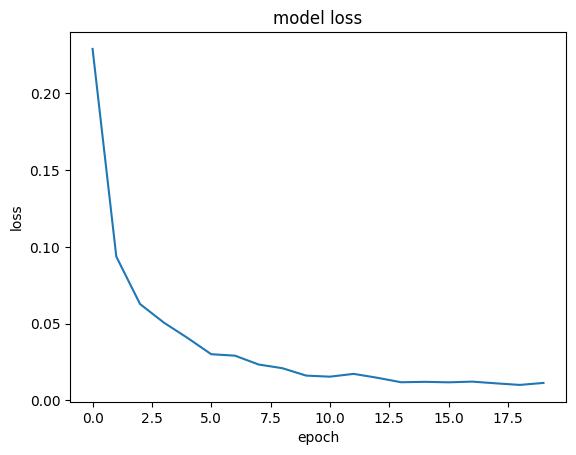

In [60]:
show_history(history3)

In [61]:
eval.append(model3.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history3.history['accuracy'][19])

313/313 - 1s - loss: 0.1423 - accuracy: 0.9785 - 829ms/epoch - 3ms/step


# Model 4

Adding a third hidden layer

In [62]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [63]:
print(model4.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2261 - accuracy: 0.9325
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1003 - accuracy: 0.9690
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0726 - accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0541 - accuracy: 0.9824
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9882
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9906
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.024

dict_keys(['loss', 'accuracy'])


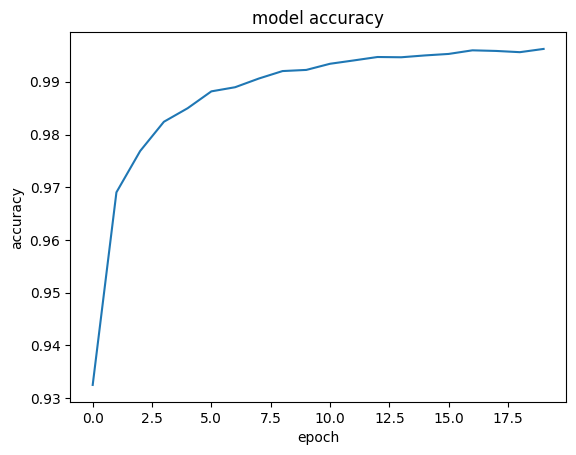

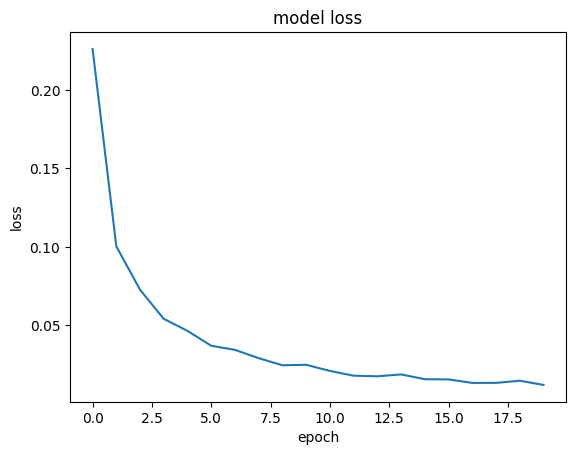

In [65]:
show_history(history4)

In [66]:
eval.append(model4.evaluate(x_test,  y_test, verbose=2)[1])

train.append(history4.history['accuracy'][19])

313/313 - 1s - loss: 0.1130 - accuracy: 0.9801 - 752ms/epoch - 2ms/step


In [68]:
predictions = model4.predict(x_test)
predicted_label = np.argmax(predictions[0])

print(predictions[0])
print(predicted_label)

313/313 [==============================] - 0s 1ms/step
[9.7474678e-16 3.9458683e-08 4.6901346e-12 1.1827745e-09 2.7610758e-09
 3.4863459e-14 1.1932571e-20 1.0000000e+00 1.7075426e-11 1.0777984e-08]
7


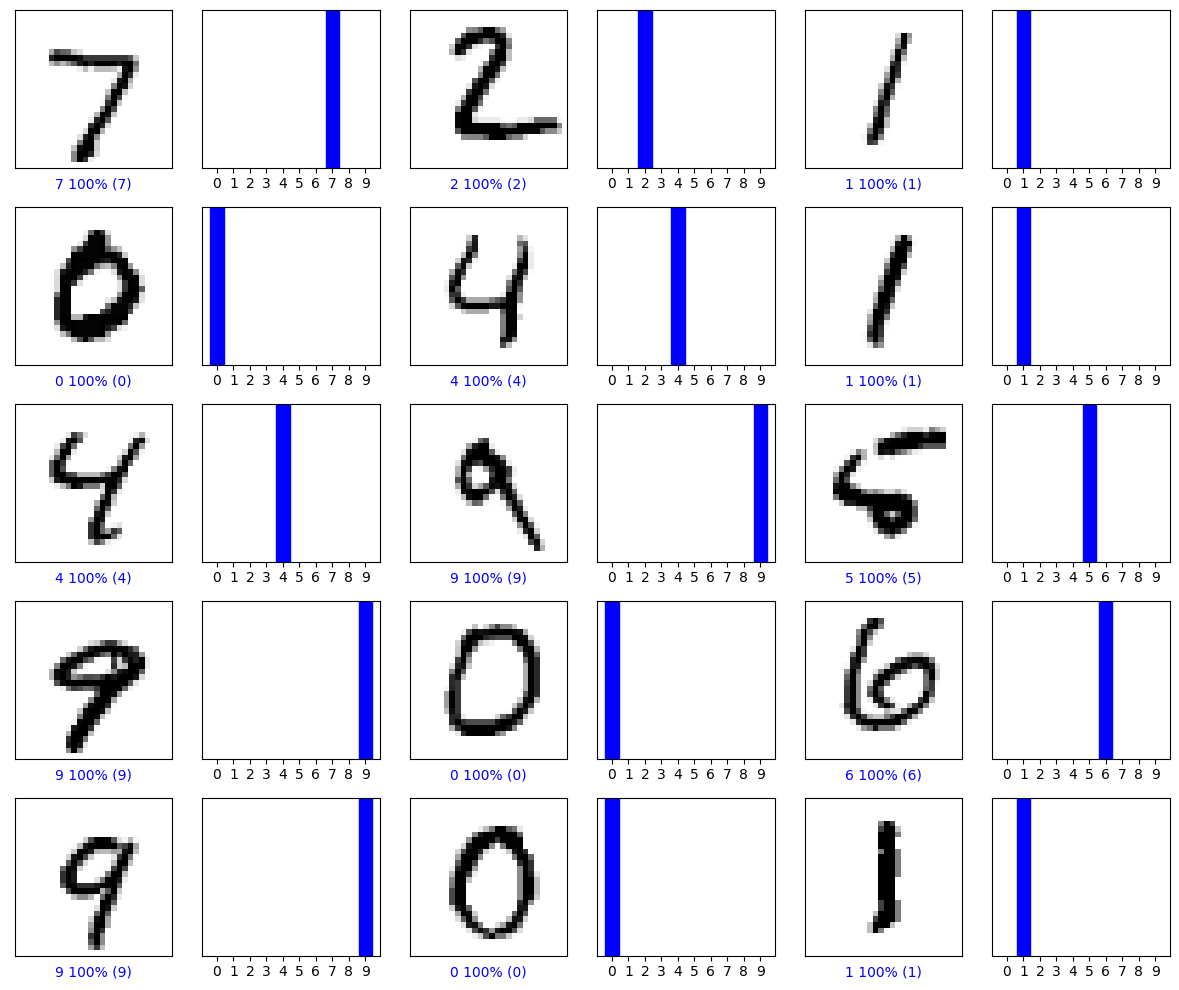

In [69]:

plot_predictions(predictions, y_test, 5, 3)

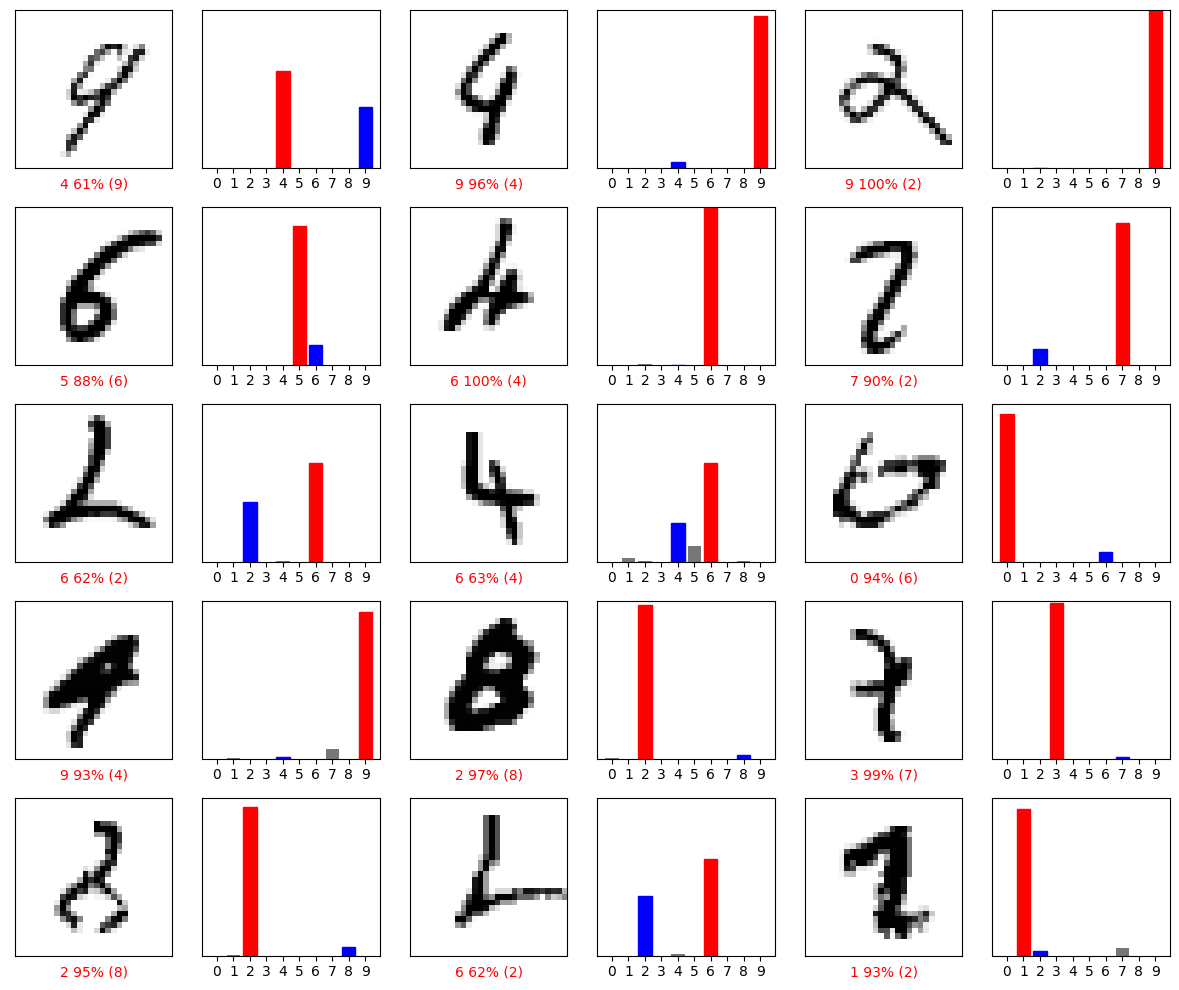

In [70]:
show_misclassified(predictions, y_test, 5, 3)

# Result comparison between the various models

The results show that the best performing model in the test set may not be the best model in the training set. This is the most relevant point here. Also, if you run this notebook multiple times, the best performing model is not necessarily the model with more trainable parameters. 

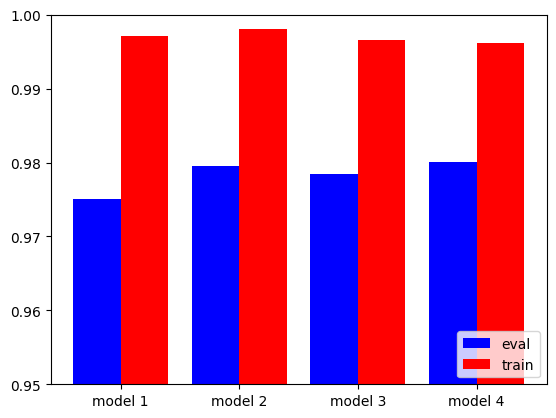

In [71]:
show_accuracies()    

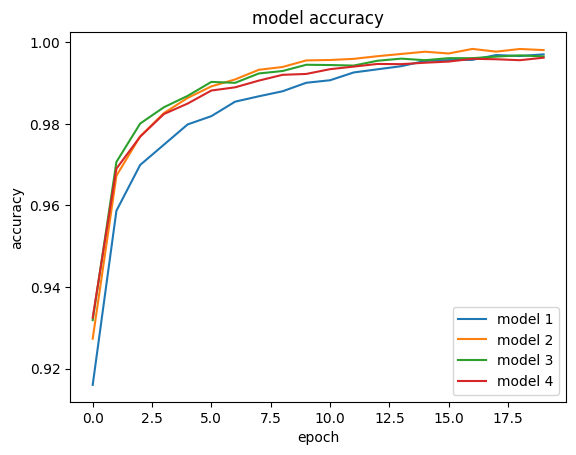

In [72]:
show_histories() 
